In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Load data
df_friends = pd.read_csv(r'./friends.csv')
df_emotions = pd.read_csv(r'./friends_emotions.csv')
df_info = pd.read_csv(r'./friends_info.csv')

In [4]:
# View the first few rows of each DataFrame
print("\nFirst few rows of df_friends:")
print(df_friends.head())

print("\nFirst few rows of df_emotions:")
print(df_emotions.head())

print("\nFirst few rows of df_info:")
print(df_info.head())


First few rows of df_friends:
                                                text           speaker  \
0  There's nothing to tell! He's just some guy I ...     Monica Geller   
1  C'mon, you're going out with the guy! There's ...    Joey Tribbiani   
2  All right Joey, be nice. So does he have a hum...     Chandler Bing   
3                           Wait, does he eat chalk?     Phoebe Buffay   
4                         (They all stare, bemused.)  Scene Directions   

   season  episode  scene  utterance  
0       1        1      1          1  
1       1        1      1          2  
2       1        1      1          3  
3       1        1      1          4  
4       1        1      1          5  

First few rows of df_emotions:
   season  episode  scene  utterance  emotion
0       1        1      4          1      Mad
1       1        1      4          3  Neutral
2       1        1      4          4   Joyful
3       1        1      4          5  Neutral
4       1        1      4   

In [5]:
# Check for data types
print('df_friends data types')
print(df_friends.dtypes)
print('\ndf_emotions data types')
print(df_emotions.dtypes)
print('\ndf_info data types')
print(df_info.dtypes)

df_friends data types
text         object
speaker      object
season        int64
episode       int64
scene         int64
utterance     int64
dtype: object

df_emotions data types
season        int64
episode       int64
scene         int64
utterance     int64
emotion      object
dtype: object

df_info data types
season                 int64
episode                int64
title                 object
directed_by           object
written_by            object
air_date              object
us_views_millions    float64
imdb_rating          float64
dtype: object


In [6]:
# Check for missing values in df_friends
print("Missing values in df_friends:")
print(df_friends.isnull().sum())

# Check for missing values in df_emotions
print("\nMissing values in df_emotions:")
print(df_emotions.isnull().sum())

# Check for missing values in df_info
print("\nMissing values in df_info:")
print(df_info.isnull().sum())

Missing values in df_friends:
text           0
speaker      276
season         0
episode        0
scene          0
utterance      0
dtype: int64

Missing values in df_emotions:
season       0
episode      0
scene        0
utterance    0
emotion      0
dtype: int64

Missing values in df_info:
season               0
episode              0
title                0
directed_by          0
written_by           0
air_date             0
us_views_millions    0
imdb_rating          0
dtype: int64


In [8]:
# Fill na in df_friends with 'Unknown Speaker'
df_friends['speaker'].fillna('Unknown Speaker', inplace=True)

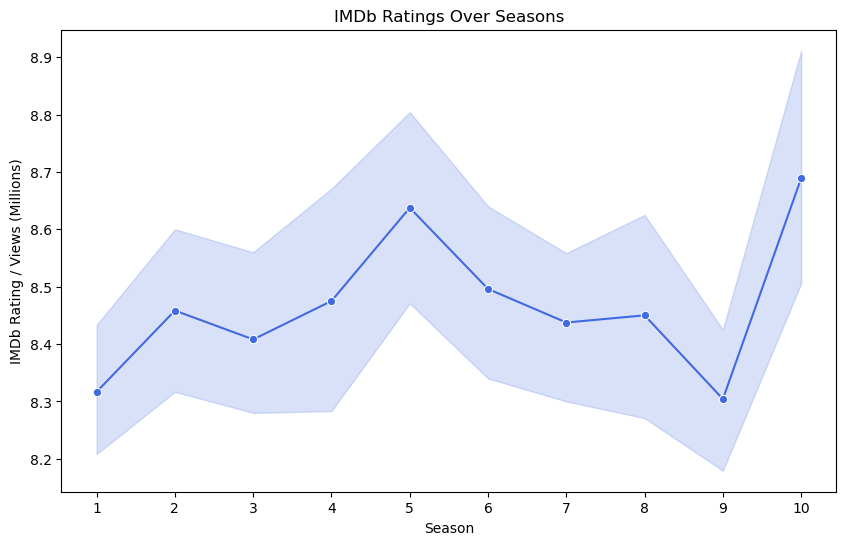

IMDb Ratings of each Seasons
        imdb_rating
season             
1          8.316667
2          8.458333
3          8.408000
4          8.475000
5          8.637500
6          8.496000
7          8.437500
8          8.450000
9          8.304167
10         8.688889


In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_info, x='season', y='imdb_rating', estimator='mean', 
             marker = 'o', color='royalblue')
plt.title("IMDb Ratings Over Seasons")
plt.xticks(np.arange(1,11,1))
plt.xlabel("Season")
plt.ylabel("IMDb Rating / Views (Millions)")
plt.show()
print("IMDb Ratings of each Seasons")
print(df_info[['season', 'imdb_rating']].groupby('season').mean())

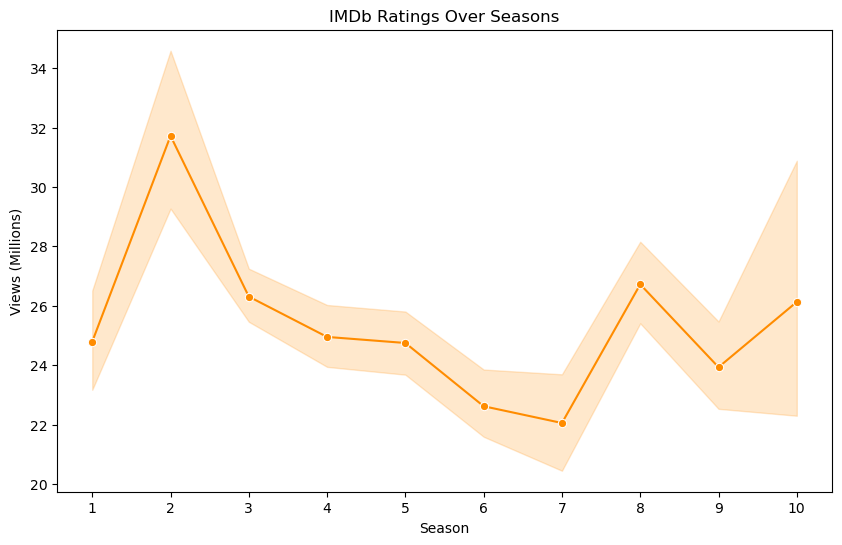

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_info, x='season', y='us_views_millions', estimator='mean', 
             marker = 'o', color='darkorange')
plt.title("IMDb Ratings Over Seasons")
plt.xticks(np.arange(1,11,1))
plt.xlabel("Season")
plt.ylabel("Views (Millions)")
plt.show()

In [11]:
df_info.

SyntaxError: invalid syntax (4191996717.py, line 1)

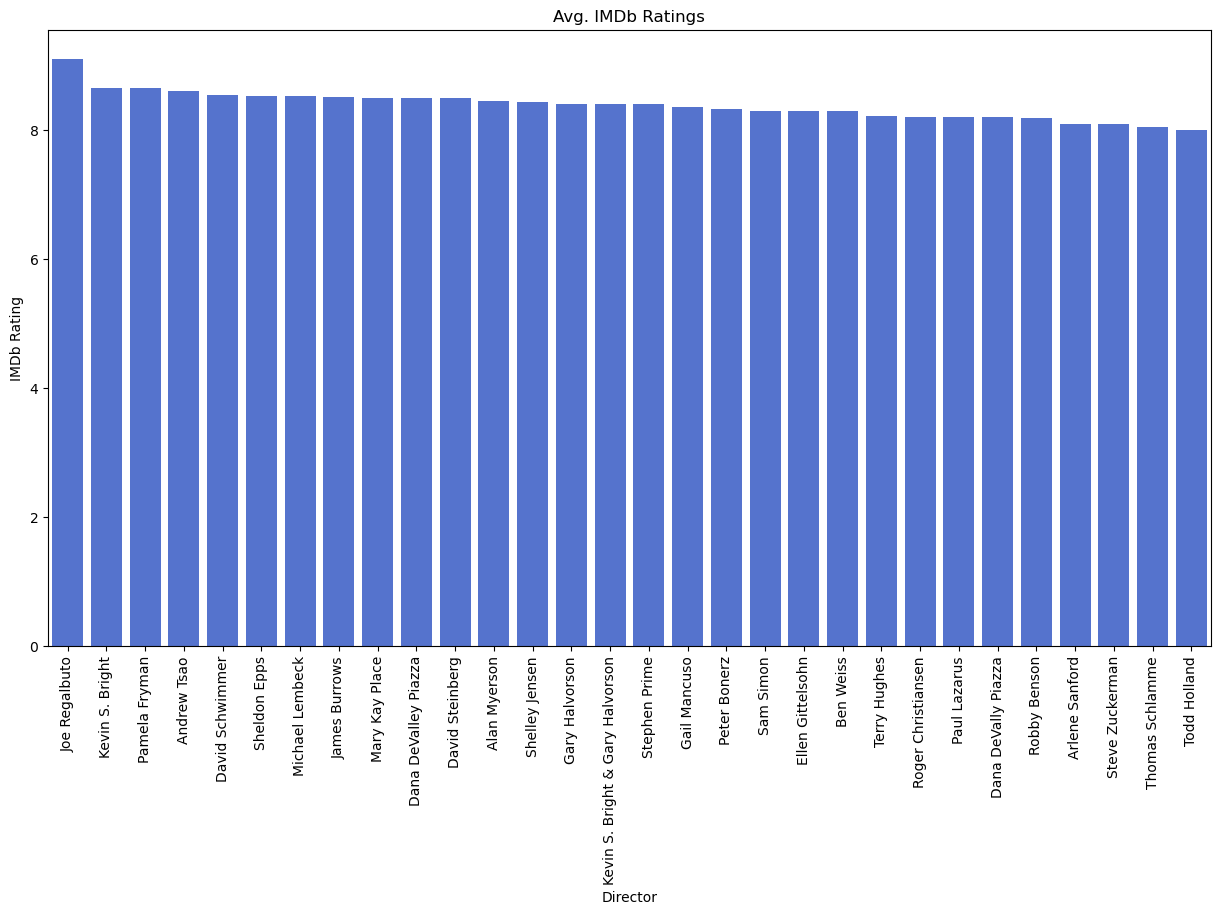

IMDb Ratings of each Seasons


In [12]:
# Find out the directos with highest ratings
fig, ax = plt.subplots(figsize=(15,8))
directors_order = df_info[['directed_by', 'imdb_rating']].groupby('directed_by').mean().sort_values('imdb_rating', ascending=False).index
sns.barplot(data = df_info, x = 'directed_by', y = 'imdb_rating', estimator = 'mean', errorbar = None, color = 'royalblue',
            order = directors_order)
plt.title("Avg. IMDb Ratings")
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("IMDb Rating")
plt.show()
print("IMDb Ratings of each Seasons")

In [13]:
# Joining dialogue and emotions
df_merged = pd.merge(df_friends, df_emotions, on=['season', 'episode', 'scene', 'utterance'])

In [56]:
# Group the data by main characters and emotion, and the dialogue counts

main_characters = ['Ross Geller', 'Joey Tribbiani', 'Chandler Bing', 'Monica Geller', 'Phoebe Buffay', 'Rachel Green']
df_main = df_merged[df_merged['speaker'].isin(main_characters)]
emotion_pivot = pd.pivot_table(df_main, values='text', index='speaker', columns='emotion', aggfunc='count')
emotion_norm = pd.crosstab(index=df_main['speaker'], columns=df_main['emotion'], normalize='index')

# Sort the groupped data descendingly
emotion_pivot = emotion_pivot.reindex(emotion_pivot.sum(axis=1).sort_values(ascending=False).index)
emotion_norm = emotion_norm.reindex(emotion_pivot.sum(axis=1).sort_values(ascending=False).index)


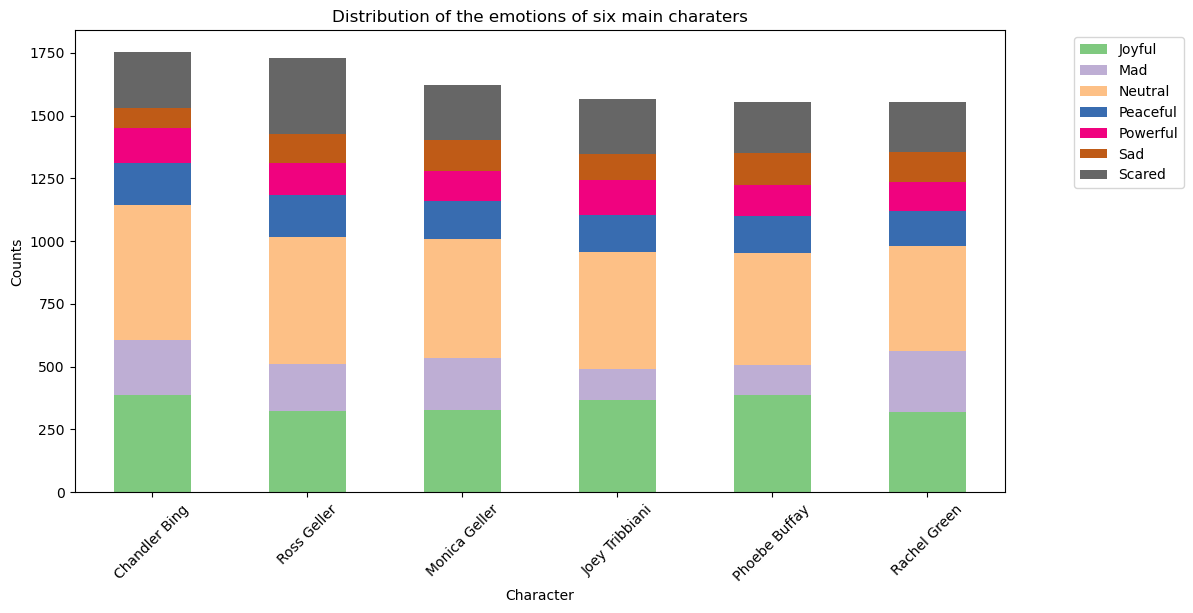

emotion         Joyful  Mad  Neutral  Peaceful  Powerful  Sad  Scared
speaker                                                              
Chandler Bing      387  218      537       169       141   78     222
Ross Geller        325  187      506       167       126  115     302
Monica Geller      326  208      476       149       119  125     220
Joey Tribbiani     368  123      466       146       141  103     220
Phoebe Buffay      386  120      446       148       122  128     204
Rachel Green       318  244      417       139       116  119     199


In [58]:
# Find the emotions distributions of the six main characters
emotion_pivot.plot(kind='bar', 
                   stacked=True, 
                   colormap='Accent',
                 figsize = (12, 6))
plt.legend(loc='upper right', ncol=1, bbox_to_anchor=(1.2, 1))
plt.title('Distribution of the emotions of six main charaters')
plt.xlabel('Character')
plt.xticks(rotation = 45)
plt.ylabel('Counts')
plt.show()
print(emotion_pivot)

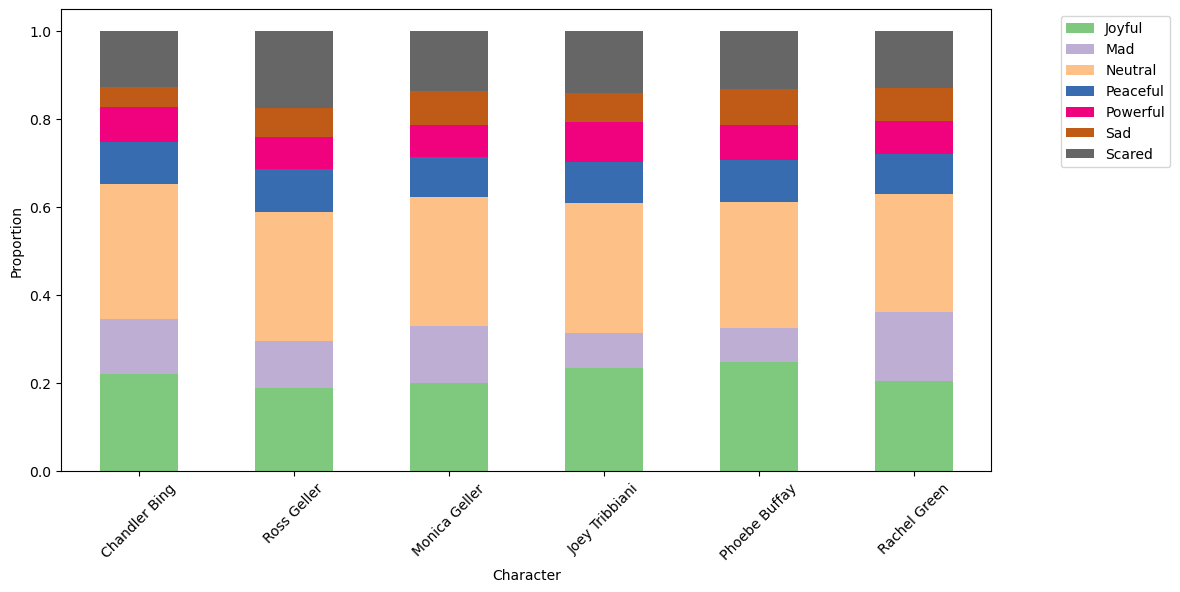

emotion           Joyful       Mad   Neutral  Peaceful  Powerful       Sad  \
speaker                                                                      
Chandler Bing   0.220890  0.124429  0.306507  0.096461  0.080479  0.044521   
Ross Geller     0.188079  0.108218  0.292824  0.096644  0.072917  0.066551   
Monica Geller   0.200863  0.128158  0.293284  0.091805  0.073321  0.077018   
Joey Tribbiani  0.234844  0.078494  0.297384  0.093172  0.089981  0.065731   
Phoebe Buffay   0.248391  0.077220  0.287001  0.095238  0.078507  0.082368   
Rachel Green    0.204897  0.157216  0.268686  0.089562  0.074742  0.076675   

emotion           Scared  
speaker                   
Chandler Bing   0.126712  
Ross Geller     0.174769  
Monica Geller   0.135551  
Joey Tribbiani  0.140396  
Phoebe Buffay   0.131274  
Rachel Green    0.128222  


In [59]:
# 100% stacked barplot to show the emotion proportion of each charcter
emotion_norm.plot(kind='bar', 
                   stacked=True, 
                   colormap='Accent',
                 figsize = (12, 6))
plt.legend(loc='upper right', ncol=1, bbox_to_anchor=(1.2, 1))
plt.xlabel('Character')
plt.xticks(rotation = 45)
plt.ylabel('Proportion')
plt.show()
print(emotion_norm)

In [75]:
print('The person with the most lines is ' + emotion_pivot.sum(axis=1).sort_values(ascending=False).index[0] + '.')
print('The most joyful person is ' + emotion_norm.sort_values('Joyful', ascending=False).index[0] + '.')
print('The most mad person is ' + emotion_norm.sort_values('Mad', ascending=False).index[0] + '.')
print('The most peaceful person is ' + emotion_norm.sort_values('Peaceful', ascending=False).index[0] + '.')
print('The most powerful person is ' + emotion_norm.sort_values('Powerful', ascending=False).index[0] + '.')
print('The most sad person is ' + emotion_norm.sort_values('Sad', ascending=False).index[0] + '.')
print('The most scared person is ' + emotion_norm.sort_values('Scared', ascending=False).index[0] + '.')

The person with the most lines is Chandler Bing.
The most joyful person is Phoebe Buffay.
The most mad person is Rachel Green.
The most peaceful person is Ross Geller.
The most powerful person is Joey Tribbiani.
The most sad person is Phoebe Buffay.
The most scared person is Ross Geller.


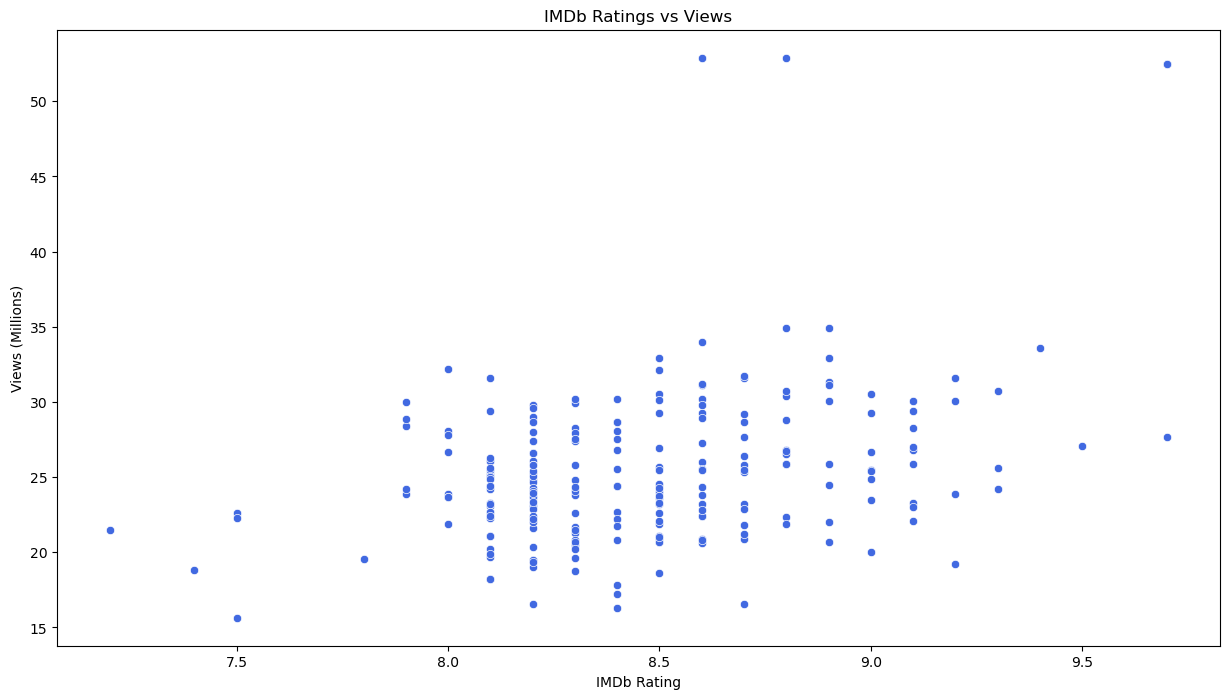

The Pearson correlation of IMDb Ratings and views is 0.38. It shows the relationship of ratings and views is not specific.


In [141]:
# Relationship between IMDb ratings and views
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data = df_info, x = 'imdb_rating', y = 'us_views_millions', color = 'royalblue')
plt.title("IMDb Ratings vs Views")
plt.xticks()
plt.xlabel("IMDb Rating")
plt.ylabel("Views (Millions)")
plt.show()
pearson = stats.pearsonr(df_info['imdb_rating'], df_info['us_views_millions'])[0]
print('The Pearson correlation of IMDb Ratings and views is '+'{:.2f}'.format(pearson)+
      '. It shows the relationship of ratings and views is not specific.')